# Carga de datos

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [18]:
df = pd.read_csv("../msd_pre.csv")

df = df[df["tempo"] != 0]
df = df[df["year"] != 0]
df = df[df["popularity"] != 0]
df = df[df["duration"] != 0]

df['duration'] = df['duration'] * 1000

df = df.dropna()

df.describe()

,year,popularity,duration,danceability,energy,key,loudness,mode,tempo,signature
count,305723.000000,305723.000000,3.057230e+05,305723.0,305723.0,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,1999.737547,0.698198,2.457375e+05,0.0,0.0,5.313025,-9.285021,0.659924,125.694146,3.639275
std,9.726383,0.306963,1.099194e+05,0.0,0.0,3.594055,4.785959,0.473735,34.522003,1.177538
min,1922.000000,0.003793,2.690160e+03,0.0,0.0,0.000000,-52.559000,0.000000,7.971000,1.000000
25%,1996.000000,0.400075,1.859914e+05,0.0,0.0,2.000000,-11.633000,0.000000,99.482500,4.000000
50%,2003.000000,0.866188,2.310265e+05,0.0,0.0,5.000000,-8.195000,1.000000,122.736000,4.000000
75%,2007.000000,0.957209,2.843685e+05,0.0,0.0,9.000000,-5.850000,1.000000,146.588000,4.000000
max,2011.000000,1.000000,3.007738e+06,0.0,0.0,11.000000,3.966000,1.000000,280.955000,7.000000


# Procesamiento

## Años
| Codigo | Años        | Decada |
| ------ | ----------- | ------ |
| 1      | 1922 - 1929 | 20s    |
| 2      | 1930 - 1939 | 30s    |
| 3      | 1940 - 1949 | 40s    |
| 4      | 1950 - 1959 | 50s    |
| 5      | 1960 - 1969 | 60s    |
| 6      | 1970 - 1979 | 70s    |
| 7      | 1980 - 1989 | 80s    |
| 8      | 1990 - 1999 | 90s    |
| 9      | 2000 - 2011 | 00s    |
| 10     | 2012 - 2019 | 10s    |
| 11     | 2020 - 2029 | 10s    |

In [19]:
def decade_classify(year):
    if year >= 1922 and year <= 1929:
        return 1
    elif year >= 1930 and year <= 1939:
        return 2
    elif year >= 1940 and year <= 1949:
        return 3
    elif year >= 1950 and year <= 1959:
        return 4
    elif year >= 1960 and year <= 1969:
        return 5
    elif year >= 1970 and year <= 1979:
        return 6
    elif year >= 1980 and year <= 1989:
        return 7
    elif year >= 1990 and year <= 1999:
        return 8
    elif year >= 2000 and year <= 2011:
        return 9
    else:
        return -1

df["year"] = df["year"].apply(decade_classify)

df["year"].unique()

array([9, 7, 8, 5, 6, 3, 4, 1, 2])

### Cambios en distribución

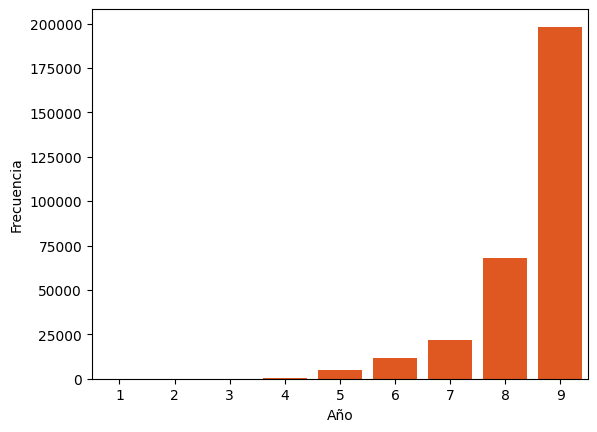

In [20]:
sns.countplot(x=df['year'], color="#ff4a01")
# plt.title('Distribución del Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

### Cambios de correlación

Text(0, 0.5, 'Popularidad Promedio')

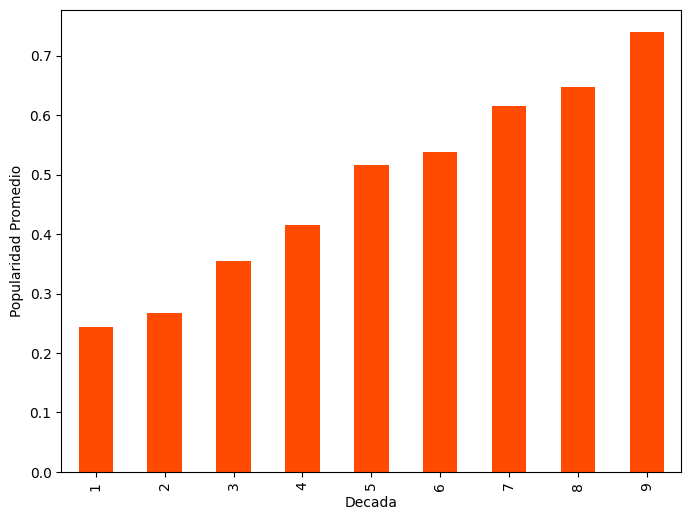

In [21]:
avg_popularity_by_decade = df.groupby('year')['popularity'].mean()

avg_popularity_by_decade.plot(kind='bar', color='#ff4a01', figsize=(8, 6))
plt.xlabel("Decada")
plt.ylabel("Popularidad Promedio")

In [22]:
spearman_corr, spearman_p_value = spearmanr(df["year"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Spearman: 0.2142088819285811, p-valor: 0.0


## Tempo

In [23]:
def tempo_transform(tempo):
    if tempo >= 200:
        return tempo / 2
    else:
        return tempo

df["tempo"] = df["tempo"].apply(tempo_transform)

df.describe()

,year,popularity,duration,danceability,energy,key,loudness,mode,tempo,signature
count,305723.000000,305723.000000,3.057230e+05,305723.0,305723.0,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,8.441347,0.698198,2.457375e+05,0.0,0.0,5.313025,-9.285021,0.659924,122.445804,3.639275
std,0.931546,0.306963,1.099194e+05,0.0,0.0,3.594055,4.785959,0.473735,30.669523,1.177538
min,1.000000,0.003793,2.690160e+03,0.0,0.0,0.000000,-52.559000,0.000000,7.971000,1.000000
25%,8.000000,0.400075,1.859914e+05,0.0,0.0,2.000000,-11.633000,0.000000,99.482500,4.000000
50%,9.000000,0.866188,2.310265e+05,0.0,0.0,5.000000,-8.195000,1.000000,120.207000,4.000000
75%,9.000000,0.957209,2.843685e+05,0.0,0.0,9.000000,-5.850000,1.000000,142.668000,4.000000
max,9.000000,1.000000,3.007738e+06,0.0,0.0,11.000000,3.966000,1.000000,199.999000,7.000000


### Cambio de distribución

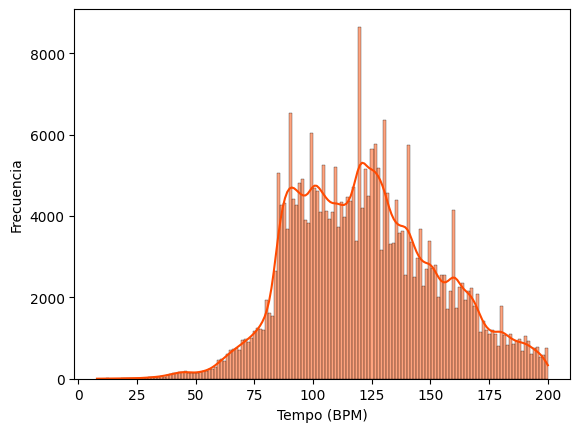

In [24]:
sns.histplot(df['tempo'], kde=True, color="#ff4a01")
# plt.title('Distribución del Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frecuencia')
plt.show()

### Cambio de correlación

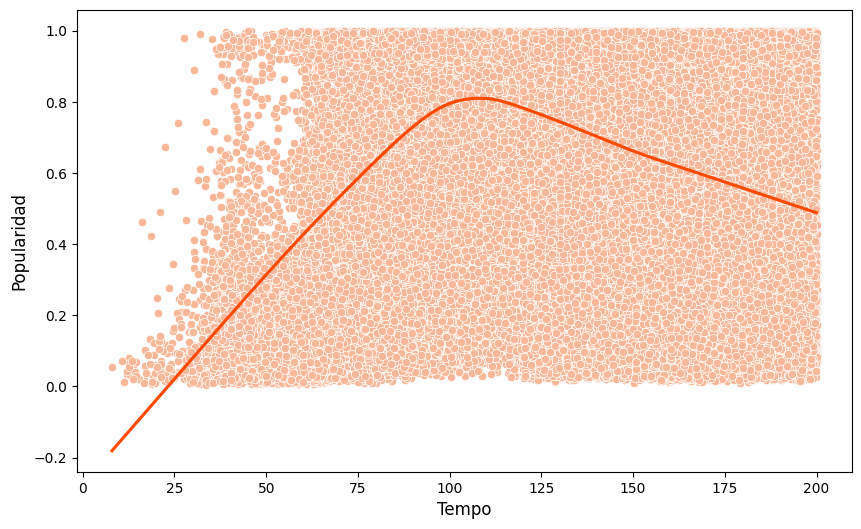

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=df, color='#F9B899')

# Añadir una curva de tendencia usando LOWESS (suavizado no lineal)
sns.regplot(x='tempo', y='popularity', data=df, scatter=False, color='#ff4a01', lowess=True)

# Añadir etiquetas y título
# plt.title('Relación entre Tempo y Popularidad con Curva de Tendencia', fontsize=16)
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)

# Mostrar el gráfico
plt.show()

In [26]:
spearman_corr, spearman_p_value = spearmanr(df["tempo"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Spearman: -0.10430991615599725, p-valor: 0.0


In [27]:
df.drop("energy", axis=1, inplace=True)
df.drop("danceability", axis=1, inplace=True)

df.describe()

,year,popularity,duration,key,loudness,mode,tempo,signature
count,305723.000000,305723.000000,3.057230e+05,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,8.441347,0.698198,2.457375e+05,5.313025,-9.285021,0.659924,122.445804,3.639275
std,0.931546,0.306963,1.099194e+05,3.594055,4.785959,0.473735,30.669523,1.177538
min,1.000000,0.003793,2.690160e+03,0.000000,-52.559000,0.000000,7.971000,1.000000
25%,8.000000,0.400075,1.859914e+05,2.000000,-11.633000,0.000000,99.482500,4.000000
50%,9.000000,0.866188,2.310265e+05,5.000000,-8.195000,1.000000,120.207000,4.000000
75%,9.000000,0.957209,2.843685e+05,9.000000,-5.850000,1.000000,142.668000,4.000000
max,9.000000,1.000000,3.007738e+06,11.000000,3.966000,1.000000,199.999000,7.000000


In [28]:
df.to_csv("../msd_processed.csv", index=False)